# ML Project : Predicting Movie Revenue
Made by:

Corentin Maillard 21306

Mourad Mettioui 195019

## A) Data Understanding and analysis

### 1) Load the Dataset and libraries

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_file_path = 'dataset.csv'
dataset_supplement_file_path = 'dataset_supplement.csv'
# transform the first collum into an index
dataset_data = pd.read_csv(dataset_file_path, index_col=0)
dataset_supplement_data = pd.read_csv(dataset_supplement_file_path, index_col=0)

dataset_supplement_data.drop(columns=['title'], inplace=True)
left = dataset_data.set_index(['id'])
right = dataset_supplement_data.set_index(['movie_id'])
data_combind = left.join(right)
# data_combind.set_index(['id'])
data_combind = data_combind.sort_values(by = 'id')
data_combind_initial = data_combind.copy()


### 2) Undersand the structure of the dataset

In [160]:
# examine the contents of the resultant Dataset using the head() command, which grabs the first five rows:
data_combind_initial.head()

,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,...,popularity,overview,original_title,original_language,keywords,homepage,genres,financial_investment,actors,production_crew
id,,,,,,,,,,,,,,,,,,,,,
5,530,6.5,Four Rooms,Twelve outrageous guests. Four scandalous requ...,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",98.0,4300000.0,1995-12-09,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,22.876230,It's Ted the Bellhop's first night on the job....,Four Rooms,en,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na...",NaN,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",4000000.0,"[{""cast_id"": 42, ""character"": ""Ted the Bellhop...","[{""credit_id"": ""52fe420dc3a36847f800012d"", ""de..."
11,6624,NaN,Star Wars,"A long time ago in a galaxy far, far away...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",121.0,775398007.0,1977-05-25,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,126.393695,Princess Leia is captured and held hostage by ...,Star Wars,en,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...",http://www.starwars.com/films/star-wars-episod...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",11000000.0,"[{""cast_id"": 3, ""character"": ""Luke Skywalker"",...","[{""credit_id"": ""52fe420dc3a36847f8000437"", ""de..."
12,6122,7.6,Finding Nemo,"There are 3.7 trillion fish in the ocean, they...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",100.0,940335536.0,2003-05-30,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,85.688789,"Nemo, an adventurous young clownfish, is unexp...",Finding Nemo,en,"[{""id"": 494, ""name"": ""father son relationship""...",http://movies.disney.com/finding-nemo,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",94000000.0,"[{""cast_id"": 8, ""character"": ""Marlin (voice)"",...","[{""credit_id"": ""52fe420ec3a36847f80006b1"", ""de..."
13,7927,8.2,Forrest Gump,"The world will never be the same, once you've ...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",142.0,677945399.0,1994-07-06,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,138.133331,A man with a low IQ has accomplished great thi...,Forrest Gump,en,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",55000000.0,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de..."
14,3313,7.9,American Beauty,Look closer.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",122.0,356296601.0,1999-09-15,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,80.878605,"Lester Burnham, a depressed suburban father in...",American Beauty,en,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",http://www.dreamworks.com/ab/,"[{""id"": 18, ""name"": ""Drama""}]",15000000.0,"[{""cast_id"": 6, ""character"": ""Lester Burnham"",...","[{""credit_id"": ""52fe420ec3a36847f8000809"", ""de..."


We can see the different features which are:
- vote count
- vote average
- title
- tagline
- status
- spoken languages
- duration
- release
- countries_of_production
- production
- popularity
- overview
- original_title
- original_language
- keywords
- homepage
- genres
- financial_investment
- actors
- production_crew

And we have the target : 
- revenue

We are going to see if all the data that we have are complete

In [161]:
data_combind_initial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 5 to 459488
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   title                    4803 non-null   object 
 3   tagline                  3959 non-null   object 
 4   status                   4803 non-null   object 
 5   spoken_languages         4803 non-null   object 
 6   duration                 4801 non-null   float64
 7   revenue                  4755 non-null   float64
 8   release                  4802 non-null   object 
 9   countries_of_production  4803 non-null   object 
 10  production               4803 non-null   object 
 11  popularity               4803 non-null   float64
 12  overview                 4800 non-null   object 
 13  original_title           4803 non-null   object 
 14  original_language        45

we can also use the isnull().sum() to see directly how many data are missing

In [162]:
data_combind_initial.isnull().sum()

vote_count                    0
vote_average                480
title                         0
tagline                     844
status                        0
spoken_languages              0
duration                      2
revenue                      48
release                       1
countries_of_production       0
production                    0
popularity                    0
overview                      3
original_title                0
original_language           240
keywords                      0
homepage                   3091
genres                        0
financial_investment        384
actors                        0
production_crew               0
dtype: int64

We can see that they are 3091 null homepage entries on 4803, so we will discard this feature because they are too many missing datas.

In [163]:
data_combind.drop(columns=['homepage'], inplace=True)


We are going to see if all the data are different or not

In [164]:
data_combind.nunique()

vote_count                 1609
vote_average                 70
title                      4800
tagline                    3944
status                        3
spoken_languages            544
duration                    156
revenue                    3268
release                    3280
countries_of_production     469
production                 3697
popularity                 4802
overview                   4800
original_title             4801
original_language            37
keywords                   4222
genres                     1175
financial_investment        412
actors                     4761
production_crew            4776
dtype: int64

We will not use the original_title column because it's different from the title column in a very rare case 261/4803, in all other cases it's the same so this feature isn't pertinent.


In [165]:
n = 0
j = 0
for i in data_combind.index:
    if data_combind.title[i] != data_combind.original_title[i]:
        n+=1
    j+=1
print("values different : ", n , "/" , j)
data_combind.drop(columns=['original_title'], inplace=True)

values different :  261 / 4803


We will discard the columns overview and tagline because they are only texts that provide a brief summary of the film. Also, this is not relevant because it has nothing to do with the revenue, and it will not be well treated by the model.

In [166]:
# data_combind.drop(columns=['overview'], inplace=True)
# data_combind.drop(columns=['tagline'], inplace=True)

the keyword columns is not relevant either because we already have genres to handle the type of content in the film

In [167]:
# data_combind.drop(columns=['keywords'], inplace=True)
data_combind.head()

,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,production,popularity,overview,original_language,keywords,genres,financial_investment,actors,production_crew
id,,,,,,,,,,,,,,,,,,,
5,530,6.5,Four Rooms,Twelve outrageous guests. Four scandalous requ...,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",98.0,4300000.0,1995-12-09,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",22.876230,It's Ted the Bellhop's first night on the job....,en,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",4000000.0,"[{""cast_id"": 42, ""character"": ""Ted the Bellhop...","[{""credit_id"": ""52fe420dc3a36847f800012d"", ""de..."
11,6624,NaN,Star Wars,"A long time ago in a galaxy far, far away...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",121.0,775398007.0,1977-05-25,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",126.393695,Princess Leia is captured and held hostage by ...,en,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",11000000.0,"[{""cast_id"": 3, ""character"": ""Luke Skywalker"",...","[{""credit_id"": ""52fe420dc3a36847f8000437"", ""de..."
12,6122,7.6,Finding Nemo,"There are 3.7 trillion fish in the ocean, they...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",100.0,940335536.0,2003-05-30,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]",85.688789,"Nemo, an adventurous young clownfish, is unexp...",en,"[{""id"": 494, ""name"": ""father son relationship""...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",94000000.0,"[{""cast_id"": 8, ""character"": ""Marlin (voice)"",...","[{""credit_id"": ""52fe420ec3a36847f80006b1"", ""de..."
13,7927,8.2,Forrest Gump,"The world will never be the same, once you've ...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",142.0,677945399.0,1994-07-06,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}]",138.133331,A man with a low IQ has accomplished great thi...,en,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",55000000.0,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de..."
14,3313,7.9,American Beauty,Look closer.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",122.0,356296601.0,1999-09-15,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...",80.878605,"Lester Burnham, a depressed suburban father in...",en,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...","[{""id"": 18, ""name"": ""Drama""}]",15000000.0,"[{""cast_id"": 6, ""character"": ""Lester Burnham"",...","[{""credit_id"": ""52fe420ec3a36847f8000809"", ""de..."


That's it for the feature selection, now that we know what we will work with we will make some preprocessing to be able to work with those datas.
Those are the selected features:

In [168]:
data_combind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 5 to 459488
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   title                    4803 non-null   object 
 3   tagline                  3959 non-null   object 
 4   status                   4803 non-null   object 
 5   spoken_languages         4803 non-null   object 
 6   duration                 4801 non-null   float64
 7   revenue                  4755 non-null   float64
 8   release                  4802 non-null   object 
 9   countries_of_production  4803 non-null   object 
 10  production               4803 non-null   object 
 11  popularity               4803 non-null   float64
 12  overview                 4800 non-null   object 
 13  original_language        4563 non-null   object 
 14  keywords                 48

We will use the ordinal encoding approach because there are too much different categories for the onehot encoding one, it would also take too long to train the model. 

In [169]:

data_combind.head()
# data_combind.loc[data_combind['production'] == 'Lucasfilm']
# data_combind.loc[data_combind['revenue']]
# data_combind.sort_values(by='revenue', ascending=False)
# data_combind

# data_combind.sort_values(by = 'title')

,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,production,popularity,overview,original_language,keywords,genres,financial_investment,actors,production_crew
id,,,,,,,,,,,,,,,,,,,
5,530,6.5,Four Rooms,Twelve outrageous guests. Four scandalous requ...,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",98.0,4300000.0,1995-12-09,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",22.876230,It's Ted the Bellhop's first night on the job....,en,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",4000000.0,"[{""cast_id"": 42, ""character"": ""Ted the Bellhop...","[{""credit_id"": ""52fe420dc3a36847f800012d"", ""de..."
11,6624,NaN,Star Wars,"A long time ago in a galaxy far, far away...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",121.0,775398007.0,1977-05-25,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",126.393695,Princess Leia is captured and held hostage by ...,en,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",11000000.0,"[{""cast_id"": 3, ""character"": ""Luke Skywalker"",...","[{""credit_id"": ""52fe420dc3a36847f8000437"", ""de..."
12,6122,7.6,Finding Nemo,"There are 3.7 trillion fish in the ocean, they...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",100.0,940335536.0,2003-05-30,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]",85.688789,"Nemo, an adventurous young clownfish, is unexp...",en,"[{""id"": 494, ""name"": ""father son relationship""...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",94000000.0,"[{""cast_id"": 8, ""character"": ""Marlin (voice)"",...","[{""credit_id"": ""52fe420ec3a36847f80006b1"", ""de..."
13,7927,8.2,Forrest Gump,"The world will never be the same, once you've ...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",142.0,677945399.0,1994-07-06,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}]",138.133331,A man with a low IQ has accomplished great thi...,en,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",55000000.0,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de..."
14,3313,7.9,American Beauty,Look closer.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",122.0,356296601.0,1999-09-15,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...",80.878605,"Lester Burnham, a depressed suburban father in...",en,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...","[{""id"": 18, ""name"": ""Drama""}]",15000000.0,"[{""cast_id"": 6, ""character"": ""Lester Burnham"",...","[{""credit_id"": ""52fe420ec3a36847f8000809"", ""de..."


We can see that for some columns the values are in a dictionnary that's itself in a list. And there are lots of different values to choose for example in the actors column, with the "cast_id",the character played in the film, the "credit_id", the gender ect... We don't need all of those information to know which actor plays in a film. 
With all of this, the treatment of those columns will be difficult so we will extract the information we want and display it correctly.

For the spoken language column there is the "iso_639_1" key and the "name" key, we will take the "iso_639_1" key because the other key gives the hole name of the language and with only 2 letters to compare we would gain some speed of treatment, two letters should be sufficient to know which language is spoken, this is the same for the countries of production column.

The production, keywords and genres column have the same structure, an id and a name. For those three we will take the "id" key because this will be easier and faster for the model to compare numbers instead of strings taken that for the model there is no difference beside that he compares strings or numbers. At the end if we really want to know which name is for a particular id we can use the initial dataset to findout.

For the two last columns

In [170]:

import json

def extract_iso(df, col_name, iso_num):
    collone_brut = df[col_name]
    
    for i in df.index:
        langperligne = []
        lst = json.loads(collone_brut[i])
        for item in lst:
            langperligne.append(item[iso_num])
        collone_brut[i] = ','.join(langperligne)
    
    return collone_brut

# Utilisez la fonction avec le nom de la colonne et le numéro d'ISO

extract_iso(data_combind, 'countries_of_production', 'iso_3166_1')
extract_iso(data_combind, 'spoken_languages', 'iso_639_1')
extract_iso(data_combind, 'genres', 'id')
extract_iso(data_combind, 'production', 'id')
extract_iso(data_combind, 'actors', 'name')
extract_iso(data_combind, 'production_crew', 'name')






# data_combind

# print(data_combind.nunique())

C:\Users\moura\AppData\Local\Temp\ipykernel_15684\1610140869.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collone_brut[i] = ','.join(langperligne)
C:\Users\moura\AppData\Local\Temp\ipykernel_15684\1610140869.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collone_brut[i] = ','.join(langperligne)
C:\Users\moura\AppData\Local\Temp\ipykernel_15684\1610140869.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collone_brut[i]

TypeError: sequence item 0: expected str instance, int found

### Visualize key statistics

In [ ]:
data_combind.describe()

,vote_count,vote_average,duration,revenue,popularity,financial_investment
count,4803.000000,4323.000000,4801.000000,4.755000e+03,4803.000000,4.419000e+03
mean,690.217989,6.090354,106.875859,8.231486e+07,21.492301,2.898466e+07
std,1234.585891,1.193315,22.611935,1.630872e+08,31.816650,4.065526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,54.000000,5.600000,94.000000,0.000000e+00,4.668070,7.500000e+05
50%,235.000000,6.200000,103.000000,1.918402e+07,12.921594,1.480000e+07
75%,737.000000,6.800000,118.000000,9.311911e+07,28.313505,4.000000e+07
max,13752.000000,10.000000,338.000000,2.787965e+09,875.581305,3.800000e+08


We can see for the vote count, the popularity and the financial investend that the mean is really low compare to the respective max value. that let us see that in this dataset they are more lower value for those data than higher value.

### Perform Exploratory Data Analysis (EDA)

In [ ]:
# sns.pairplot(dataset_data)  # Visualize pairwise relationships using a pairplot
# plt.show()

We can see that that the revenue will be affected by:
- the financial investment
- the vote count

For the other features (vote average, duration, popularity), it is not really visible the impact they have an the revenue

We can see that the vote average is affected by:
- the vote count
- the financial investment

We can see a big problem, that is the feature that are not number cannot be used to make an EDA with the way I make it.

### Trends in the data

A) feature : financial_investment

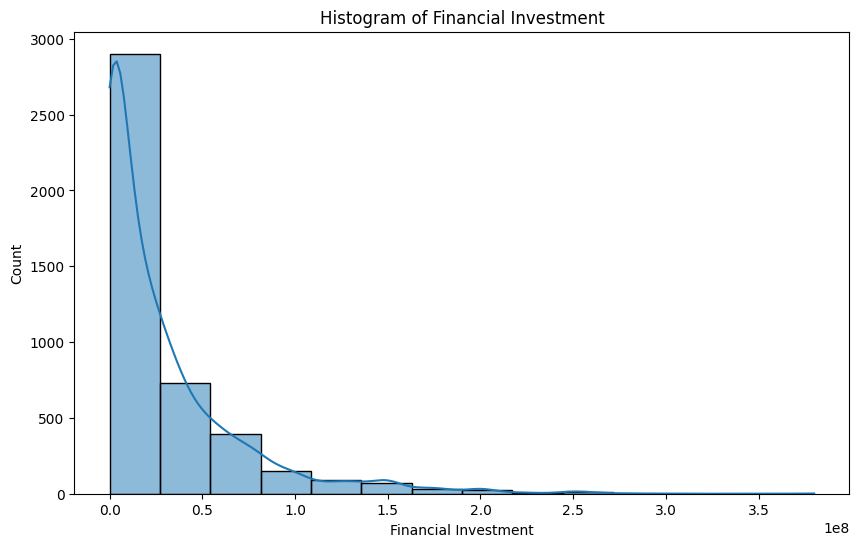

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_combind['financial_investment'], bins=14, kde=True)
plt.title('Histogram of Financial Investment')
plt.xlabel('Financial Investment')
plt.show()

We can see that most of the data have an financial investment which are extremly small for a film. So we can question ourself if the remaining datas will be enought. Because if we only take the small financial investment then we only test for them and nothing else...

B) vote count

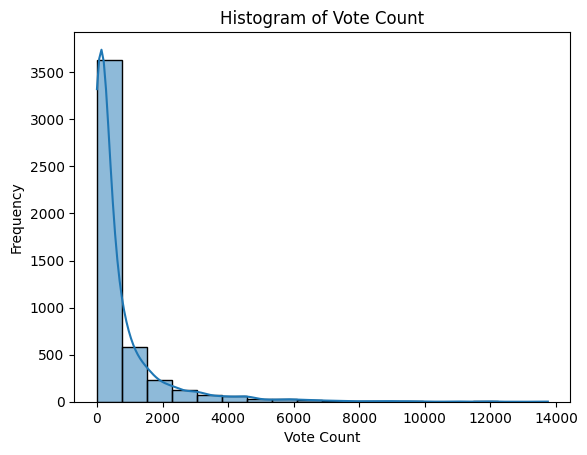

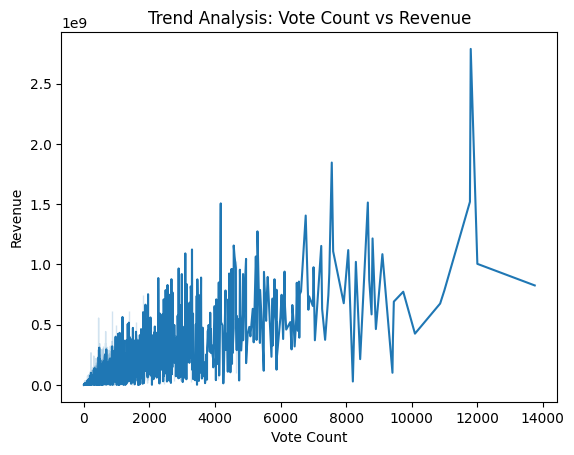

In [ ]:
sns.histplot(data_combind['vote_count'], bins=18, kde=True)
plt.title('Histogram of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

Like for the financial investment, they are a lot of data with low number of vote for the films

### Patterns or correlations between features and the target

A) feature : financial_investment

In [ ]:
feature = 'financial_investment'
target = 'revenue'
sns.lineplot(x=feature, y=target, data =data_combind)  # Line plot
plt.title('Analysis: Financial Investment vs Revenue')
plt.xlabel('Financial Investment')
plt.ylabel('Revenue')
plt.show()

We can see that in general the higher is the financial investment and higher the revenue will be. Which is something logical because if you have more budget you can emploie more famous actor, make more special effect, have better movie set and multiple orther thing that will improve the quality of your film that should made the people love it more.

B) vote count

In [ ]:
sns.lineplot(x='vote_count', y='revenue', data=data_combind)
plt.title('Analysis: Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

We can see that with the vote count increasing it tends in means to increase the revenue. This tendency is logical because if there is a large number of vote it indicate that there is more exposure among the audience and it means that more people have seen it so it will increase the revenue.

C) Average vote

In [ ]:
sns.lineplot(x='vote_average', y='revenue', data=data_combind)
plt.title('Analysis: Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

We can see that te revenue really augment from the score of 4 to the score of 8 before decreasing drasticly until the full score of 10. This can be explain as the higher the score and the higher it will be appealing to the audiences and so create more revenue for the film. We can also see a drastic decrease of the revenue after 8.5 despite the increas of the score that can be due to a low number of vote so that score does not really represent the quality of the film.

In [ ]:
#test to see if my assumption was true
data_combind.loc[data_combind.vote_average > 8.7]

We can see that my assumption was true there is only 1 or 2 vote for the high level score which meams that it is easier to make a score that does not reflect the quality of the film.